In [1]:
import audio_processing as ap
import audio_utils as au
import prototype as pr
import math
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

instrs = ["guitar", "clarinet", "flute", "saxophone", "violin"]

In [2]:
prototypes = []
exemplars = []
ind = 0
for instr in instrs:
    exemplars.append([])
    infile = open("reps/" + instr + "_harmonics.txt", 'r')
    for line in infile:
        ex = []
        for i in line.split(','):
            ex.append( float(i.strip()) )
        exemplars[ind].append(ex)
    infile.close()
    p = pr.create_prototype(exemplars[ind])
    prototypes.append(p)
    ind += 1
print(np.array(prototypes) )
    

[[ 1.          0.09854176  0.12267083  0.17575874  0.18015025  0.21846029
   0.18708441  0.24378326]
 [ 1.          0.0018178   0.00184637  0.00180747  0.00187048  0.00187077
   0.00174611  0.00193864]
 [ 1.          0.05749046  0.04627587  0.03685894  0.03542063  0.03864822
   0.03609048  0.03916336]
 [ 1.          0.00502223  0.00537474  0.00445526  0.00404386  0.00334559
   0.00284447  0.00362899]
 [ 1.          0.05308918  0.04507265  0.03393457  0.03121332  0.03255566
   0.02535387  0.02753111]]


In [17]:
def prediction(probs, instrs):
    predict_list = []
    for i in probs:
        predict_list.append(instrs[np.argmax(i)])
    return predict_list

def frequency(predict_list, desired):
    sum = 0
    for i in predict_list:
        if i == desired:
            sum += 1
    return sum

def freq_list(predict_list, instrs):
    list = [0]*len(instrs)
    for i in instrs:
        for j in predict_list:
            if j == i:
                list[i] += 1
    return list

def confusion_matrix (probs_list, instrs, outp_length):
    """Gets confusion matrix for a networks output."""
    confusion = np.zeros((outp_length, outp_length))
    for indx in range(len(probs_list)):
        # print(desired[indx])
        i = indx
        # print(actual[indx])
        #print(probs_list[indx])
        for k in probs_list[indx]:
            j = np.argmax(k)
            confusion[i][j] += 1
    return confusion

def print_cc_info(cc, data_length, categories):
    sum1, sum2 = 0, 0
    class_list = []
    for i in range(len(cc)):
        for j in range(len(cc[i])):
            if j == i: 
                sum1 += cc[i][j]
                class_list.append(cc[i][j])
            sum2 += cc[i][j]
    print("This NN got correct ", sum1, " out of ", sum2, " tests")
    print("which is ", str(sum1/sum2)[:5])
    print(categories)
    for i in range(len(categories)):
        print("For", categories[i], ", This NN classified", class_list[i], " out of ", data_length)
        print("which is ", str(class_list[i]/data_length)[:5])

In [4]:
guesses = []

for i in range(5):
    guesses.append([])
    for ex in exemplars[i]:
        guess = predict(ex, prototypes)
        guesses[i].append(guess)

NameError: name 'predict' is not defined

In [5]:
for i in range(len(guesses)):
    correct = 0
    tot = len(guesses[i])
    for j in guesses[i]:
        if j == i:
            correct += 1
    print(correct / tot)
    
a = [0,0,0,0,0]
for i in guesses[4]:
    a[i] += 1
print(a)

ZeroDivisionError: division by zero

['flute', 'guitar', 'saxophone', 'guitar', 'guitar', 'guitar', 'flute', 'guitar', 'guitar', 'guitar', 'flute', 'guitar', 'flute', 'flute', 'flute', 'guitar', 'guitar', 'guitar', 'flute', 'violin', 'guitar', 'guitar', 'flute', 'guitar', 'guitar', 'flute', 'guitar', 'guitar', 'flute', 'flute', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'violin', 'guitar', 'flute', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'violin', 'guitar', 'guitar', 'guitar', 'flute', 'guitar', 'guitar', 'guitar', 'guitar', 'flute', 'flute', 'flute', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar', 'guitar']
[0, 0, 0, 0, 0, 0]


AssertionError: incompatible sizes: argument 'height' must be length 6 or scalar

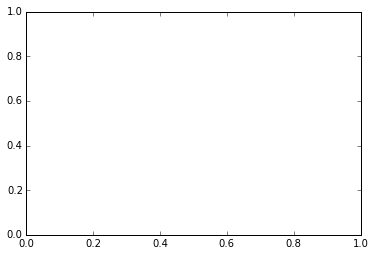

In [25]:
h_data = []
instrs = ["guitar", "clarinet", "flute", "saxophone", "violin"]
ind = 0
for instr in instrs:
    h_data.append([])
    infile = open("reps/" + instr + "_harmonics.txt", 'r')
    for line in infile:
        ex = []
        for i in line.split(','):
            ex.append( float(i.strip()) )
        h_data[ind].append(ex)
    ind += 1
    
proto_list = []
for i in h_data:
    proto_list.append(pr.create_prototype(i))
probs_list = []  
for h in h_data:
    probs_list.append(pr.prototype_model(h, proto_list, pr.euclid_d))
    
    
    
    
#for i in range(5):
print(prediction(probs_list[0], instrs))
    
guitar_f = freq_list(prediction(probs_list[0], instrs), "guitar")

print(guitar_f)

plt.bar(instr, str(guitar_f), width=.8, color='g')

plt.ylabel('SSE')
plt.title('SSE for Elman Network Outputs')

plt.xticks(tick_locations, tick_names)
plt.show()



cm = confusion_matrix(probs_list, instrs, 5)
print(cm)


In [18]:
f_data = []
instrs = ["guitar", "clarinet", "flute", "saxophone", "violin"]
ind = 0

for instr in instrs:
    f_data.append([])
    infile = open("reps/" + instr + "_nflux.txt", 'r')
    for line in infile:
        ex = []
        for i in line.split(','):
            ex.append( float(i.strip()) )
        f_data[ind].append(ex)
    ind += 1

    
proto_list = []
for i in f_data:
    proto_list.append(pr.create_prototype(i))
print(proto_list)
probs_list = []  
for f in f_data:
    probs_list.append(pr.euclid_d_prototype_model(f, proto_list, pr.euclid_d))
    
    

    
cm = confusion_matrix(probs_list, instrs, 5)
print(cm)
print_cc_info(cm, 100, instr)

FileNotFoundError: [Errno 2] No such file or directory: 'reps/guitar_nflux.txt'